In [96]:
"""
Visualization of Dynamics of Simple Neural Networks
"""
import numpy as np
import scipy as sp
import timeit
import matplotlib.pyplot as plt
from importlib import reload 
from neuron import Neuron
from network import Network


# also define figure paramaters
plotparams = {'legend.fontsize': 'large',
    'figure.figsize': (8, 6),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'text.usetex': 'True',
    'xtick.major.size': 6.,
    'ytick.major.size': 6.
    }
plt.rcParams.update(plotparams)
#normalized guassian for constructing input signals
Gaussian_pulse= lambda x, mu, sig: np.exp(-np.power(x - mu, 2.) 
    / (2 * np.power(sig, 2.)))/(np.sqrt(2*np.pi)*sig)

In [97]:
import network
reload(network)
Network=network.Network

In [98]:
#basic setup stuff
#Create a basic Yamada Neuron 
Y1mpars={"a": 2, "A": 6.5, "B":-6., "gamma1": 1,
         "gamma2": 1, "kappa": 50, "beta": 5e-1 }
y1_steady_est=[Y1mpars['beta']/Y1mpars['kappa'],
               Y1mpars['A'],Y1mpars['B'] ]
Y1params={"model" : "Yamada_1", "y0": y1_steady_est,
    "dt": 1e-2, 'mpar': Y1mpars} #quick estimate of ss
Y1Neuron=Neuron(Y1params)
y1_steady=Y1Neuron.steady_state(y1_steady_est) #true steady state
Y1params["y0"]=y1_steady #change model parameters so that starts w this ss
Y1Neuron.set_initial_state(y0=y1_steady)
#now just use Y1params to initialize neurons





In [99]:
#1 input 3 neuron feed forward network

neurons1=[Neuron(Y1params), Neuron(Y1params), Neuron(Y1params)]
 #Input->Neuron1->Neuron2 -> Neuron3
weights1=np.array([[1,0,0, 0],[0,0.1,0, 0], [0,0,0.1, 0.]])
delays1=np.array([[0., 0., 0.], [0.5, 0., 0.],[0.,0.5, 0.]])
#create network
network1=Network(neurons1, weights1, delays1)


#create time signal, set params in terms of gamma1
t1_end=11./Y1mpars["gamma1"]; #atleast this long
N1=int(np.ceil(t1_end/network1.dt)) #this many points
time1=np.linspace(0.,(N1-1)*network1.dt, num=N1 )
#input signal is series of Gaussians, first is below threshold
in1=np.zeros(N1)
in1+=0.2*Gaussian_pulse(time1, 0.1/Y1mpars["gamma1"], 5.e-2/Y1mpars["gamma1"])
in1+=0.4*Gaussian_pulse(time1, 1./Y1mpars["gamma1"], 5.e-2/Y1mpars["gamma1"])
in1+=0.4*(Gaussian_pulse(time1, 7./Y1mpars["gamma1"], 5.e-2/Y1mpars["gamma1"])*
          np.random.normal(1, 1,N1))

#solve network
start_time = timeit.default_timer()

output1=network1.network_solve(in1)
input1=network1.network_inputs(network_outputs=output1, external_inputs=in1)

elapsed1 = timeit.default_timer() - start_time
print("Elapsed time is {} seconds".format(elapsed1))


Elapsed time is 0.09262152999872342 seconds


In [100]:
network1.dt

0.01

''

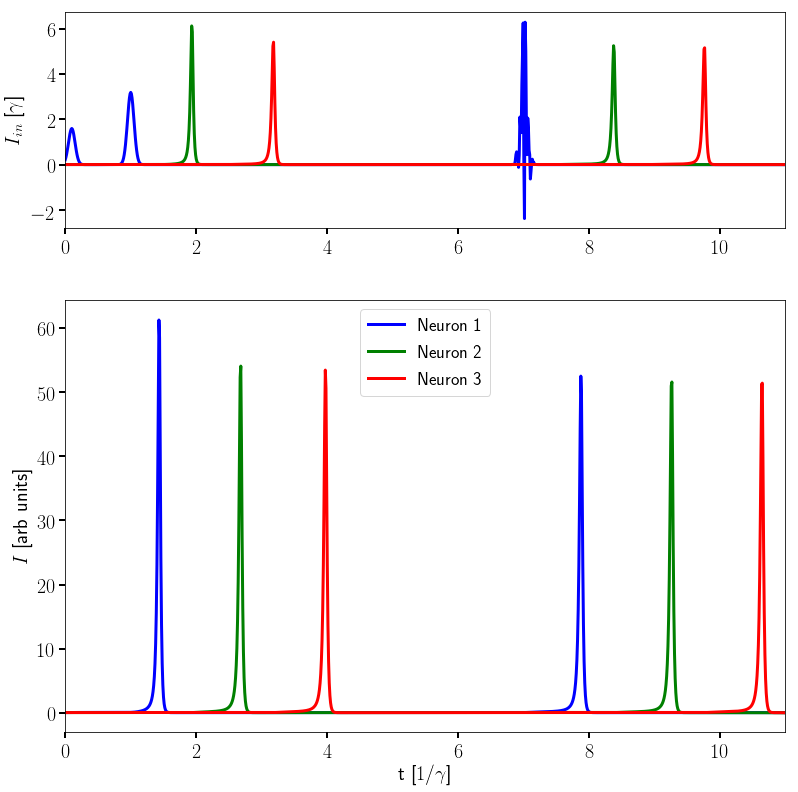

In [101]:
# also define figure paramaters

plotparams = {'figure.figsize': (10, 10),
    'axes.labelsize': '20',
    'axes.titlesize':'22',
    'xtick.labelsize':'20',
    'ytick.labelsize':'20',
    'lines.linewidth' : 3,
    'legend.fontsize': '18',
    'text.usetex': 'True',
    'xtick.major.size': 6.,
    'ytick.major.size': 6.,
    'axes.prop_cycle'    : plt.cycler(color='bgrcmyk')
    }
plt.rcParams.update(plotparams)


#plot
fig2=plt.figure()
ax1=fig2.add_axes([0,0.0, 1, 0.6])
ax2=fig2.add_axes([0,.7, 1, 0.3])

# plot steady states

# plot Neuron state and input current
for ind in range(output1.shape[1]):
    ax1.plot(time1, output1[:,ind],label='Neuron {}'.format(ind+1))
    ax2.plot(time1, input1[:,ind])
    
ax1.set_xlabel('t [$1/\gamma$]')
ax1.set_ylabel('$I$ [arb units]')
ax2.set_ylabel('$I_{in}$ [$\gamma$]')

ax1.set_xlim(time1[0], time1[-1])
ax2.set_xlim(time1[0], time1[-1])
ax1.legend()
;

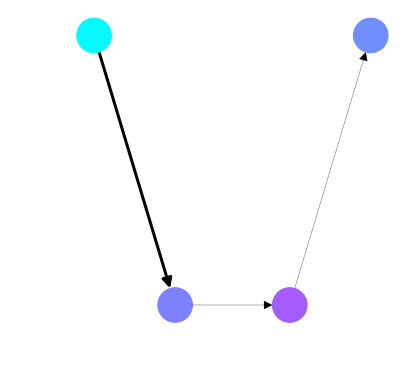

In [102]:
network1.visualize()

In [86]:
# Inhibitory 2 input 2 neuron network
#neuron 1 is regularly firing, neuron 2 stops neuron 1 from firing 

neurons2=[Neuron(Y1params), Neuron(Y1params)]
weights2=np.array([[1.,0.,0., -0.2],[0.,1.,0., 0.]]) #Neuron 1 receieves input,feeds to neuron 2
delays2=np.array([[0., 0.5], [0., 0.]])
#create network
network2=Network(neurons2, weights2, delays2, dt=0.001)

t2_end=29./Y1mpars["gamma1"]; #atleast this long
N2=int(np.ceil(t2_end/network2.dt)) #this many points
time2=np.linspace(0.,(N2-1)*network2.dt, num=N2 )
#input signal is series of Gaussians, first is below threshold
in2=np.zeros([N2, 2])
#scale with gamma1 so drive in units of A
in2[:, 0]+=(0.3*Y1mpars["gamma1"])*np.heaviside(time2, 0.5)
in2[:, 1]+=(0.6*Y1mpars["gamma1"])*np.heaviside(time2-8./Y1mpars["gamma1"], 0.5)
in2[:, 1]+=(-0.6*Y1mpars["gamma1"])*np.heaviside(time2-19./Y1mpars["gamma1"], 0.5)


#solve network
start_time = timeit.default_timer()

output2=network2.network_solve(in2)
input2=network2.network_inputs(network_outputs=output2, external_inputs=in2)

elapsed1 = timeit.default_timer() - start_time
print("Elapsed time is {} seconds".format(elapsed1))

Elapsed time is 1.384841099003097 seconds


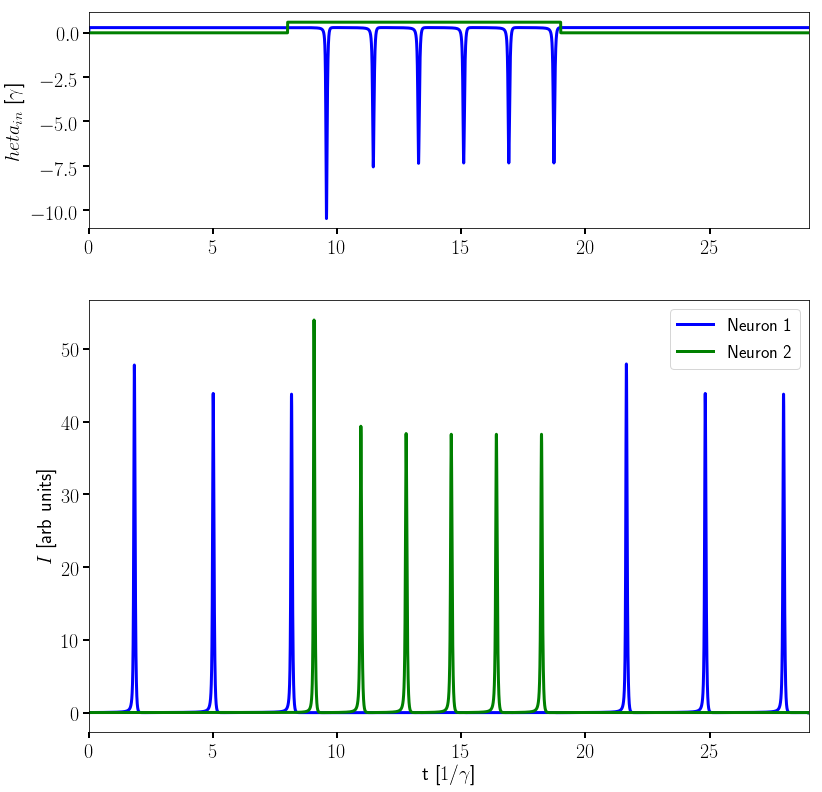

In [87]:
#plot
fig2=plt.figure()
ax1=fig2.add_axes([0,0.0, 1, 0.6])
ax2=fig2.add_axes([0,.7, 1, 0.3])

# plot steady states

# plot Neuron state and input current
for ind in range(output2.shape[1]):
    ax1.plot(time2, output2[:,ind],label='Neuron {}'.format(ind+1))
    ax2.plot(time2, input2[:,ind])
    
ax1.set_xlabel('t [$1/\gamma$]')
ax1.set_ylabel('$I$ [arb units]')
ax2.set_ylabel('$\theta_{in}$ [$\gamma$]')

ax1.set_xlim(time2[0], time2[-1])
ax2.set_xlim(time2[0], time2[-1])
ax1.legend()

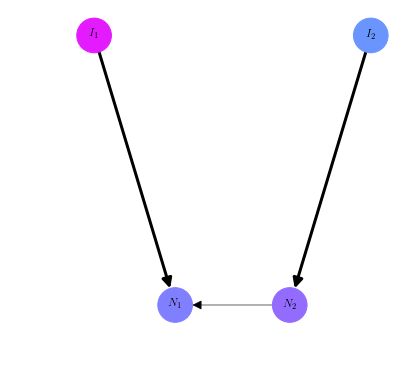

In [88]:
network2.visualize()